# CSE 587 - Data Intensive Computing


## Project Phase 1

<p>
Name - Sweta Sahu &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;UBIT - swetasah</br>
Name - Patil Prajakta Yashwant &nbsp; &nbsp; UBIT - ppatil23</br>
Name - Venkateswaran Sruthisri &nbsp; &nbsp;UBIT - sv94
</p>


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data Cleaning and Preprocessing

In [2]:
# load dataset
customer_churn_df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn_df.shape

(7043, 21)

In [5]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
customer_churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
customer_churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Converting datatype of TotalCharges from object to float
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce')

In [9]:
# checking duplicate data
customer_churn_df.duplicated().sum()

0

In [10]:
# checking null values in each column
customer_churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# checking dataframe where we have NaN values for Total Charges column
customer_churn_df[np.isnan(customer_churn_df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
# Checking the indexes where we have tenure = 0
customer_churn_df['tenure'][customer_churn_df['tenure'] == 0]

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

In [13]:
# Filtering data where tenure is not equal to 0
customer_churn_df = customer_churn_df[customer_churn_df['tenure'] != 0]

In [14]:
# checking if all the rows with tenure 0 are dropped or not
customer_churn_df['tenure'][customer_churn_df['tenure'] == 0]

Series([], Name: tenure, dtype: int64)

In [15]:
# checking if all the rows of Total Charges with NaN values are dropped or not
customer_churn_df['TotalCharges'].isnull().sum()

0

In [16]:
# Checking unique values in MultipleLines column
customer_churn_df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [17]:
# Replaced "No phone service" with "No"
customer_churn_df['MultipleLines'] = customer_churn_df['MultipleLines'].replace('No phone service', 'No')

In [18]:
# Convert binary categorical variables to numeric
binary_variables = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'PaperlessBilling', 'Churn']
for var in binary_variables:
    customer_churn_df[var] = pd.Categorical(customer_churn_df[var], categories=['No', 'Yes'], ordered=True)
    customer_churn_df[var] = customer_churn_df[var].cat.codes

In [19]:
customer_churn_df['gender'] = pd.Categorical(customer_churn_df['gender'], categories=['Female', 'Male'], ordered=True)
customer_churn_df['gender'] = customer_churn_df['gender'].cat.codes

In [20]:
# Create a binary flag for customers with internet service
customer_churn_df['HasInternetService'] = (customer_churn_df['InternetService'] == 'No').astype(int)

In [21]:
# Calculate total services subscribed by each customer
service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
customer_churn_df['TotalServices'] = customer_churn_df[service_columns].apply(lambda row: (row == 'Yes').sum(), axis=1)

In [22]:
# Create a loyalty category based on tenure
customer_churn_df['LoyaltyCategory'] = pd.cut(customer_churn_df['tenure'], bins=[0, 12, 24, 36, customer_churn_df['tenure'].max()], labels=['New', 'Loyal', 'Very Loyal', 'Long-term'])

In [23]:
# Calculate average monthly charges
customer_churn_df['AvgMonthlyCharges'] = customer_churn_df['TotalCharges'] / customer_churn_df['tenure']

In [24]:
# Create a binary flag for price increase and for customers with dependents or partners
customer_churn_df['HadPriceIncrease'] = (customer_churn_df['MonthlyCharges'] > customer_churn_df['AvgMonthlyCharges']).astype(int)
customer_churn_df['HasFamilySupport'] = ((customer_churn_df['Partner'] == 1) | (customer_churn_df['Dependents'] == 1)).astype(int)

In [25]:
# Finding high-value customers
customer_churn_df['IsHighValue'] = (customer_churn_df['TotalCharges'] > customer_churn_df['TotalCharges'].quantile(0.8)).astype(int)

In [26]:
# Calculate the difference between monthly and average charges
customer_churn_df['ChargeDifference'] = customer_churn_df['MonthlyCharges'] - customer_churn_df['AvgMonthlyCharges']

In [27]:
# Categorize 'TotalCharges' into low, medium, high, very high
customer_churn_df['TotalChargesCategory'] = pd.qcut(customer_churn_df['TotalCharges'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [28]:
# One Hot Encoding multi category columns
multi_categorical_variables = ['InternetService', 'OnlineSecurity', 'OnlineBackup','PaymentMethod', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
customer_churn_df_ohe = pd.get_dummies(customer_churn_df[multi_categorical_variables], prefix=multi_categorical_variables, dtype=int)

In [29]:
# Concatenating the ohe hot encoded columns and our dataframe
customer_churn_df_encoded = pd.concat([customer_churn_df, customer_churn_df_ohe], axis=1)

In [30]:
# Drop customerID column
customer_churn_df_encoded.drop('customerID', axis=1, inplace=True)

In [31]:
# Dataframe with encoded columns
customer_churn_df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,DSL,No,Yes,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,DSL,Yes,No,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,0,DSL,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,DSL,Yes,No,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,0,Fiber optic,No,No,...,0,1,0,0,1,0,0,1,0,0


In [32]:
numerical_col = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChargeDifference', 'AvgMonthlyCharges']

# Identifying ouliers by calculating Z score
for col in numerical_col:
    z_scores = np.abs(stats.zscore(customer_churn_df_encoded[col]))
    outliers = customer_churn_df_encoded[z_scores > 3] # 3 standard deviation
    print(f"{outliers[[col]]}\n")

Empty DataFrame
Columns: [tenure]
Index: []

Empty DataFrame
Columns: [MonthlyCharges]
Index: []

Empty DataFrame
Columns: [TotalCharges]
Index: []

      ChargeDifference
47            8.575000
69           -8.885000
171         -17.000000
353          -8.175000
507          10.450000
...                ...
6800          9.600000
6823         -8.362500
6889          8.366667
6970          8.012500
7008        -10.366667

[126 rows x 1 columns]

Empty DataFrame
Columns: [AvgMonthlyCharges]
Index: []



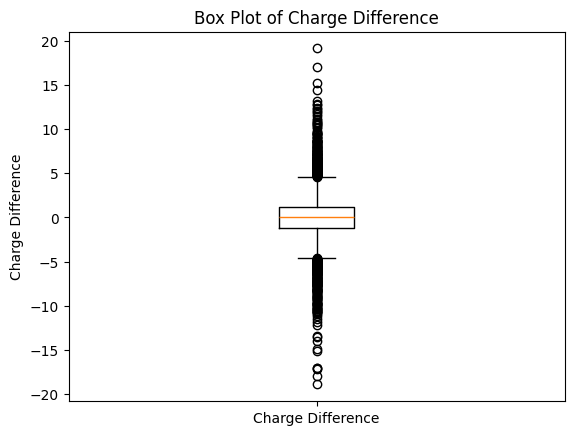

In [33]:
# Visualizing outliers for the ChargeDifference column using Box plot
plt.figure()
plt.boxplot(customer_churn_df_encoded['ChargeDifference'])
plt.ylabel('Charge Difference')
plt.xticks([1], ['Charge Difference'])
plt.title('Box Plot of Charge Difference')
plt.show()

In [34]:
# Calculating lower quatile and upper quatile
Q1 = customer_churn_df_encoded['ChargeDifference'].quantile(0.25)
Q3 = customer_churn_df_encoded['ChargeDifference'].quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [35]:
# Replacing upper ouliers with upper bound and lower ouliers with lower bound
customer_churn_df_encoded['ChargeDifference'] = np.where(customer_churn_df_encoded['ChargeDifference'] < lower_bound, lower_bound, customer_churn_df_encoded['ChargeDifference'])
customer_churn_df_encoded['ChargeDifference'] = np.where(customer_churn_df_encoded['ChargeDifference'] > upper_bound, upper_bound, customer_churn_df_encoded['ChargeDifference'])

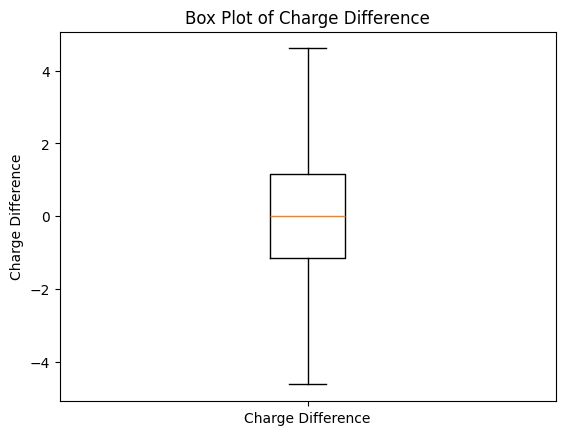

In [36]:
# Visualizing if the outliers are handled or not
plt.figure()
plt.boxplot(customer_churn_df_encoded['ChargeDifference'])
plt.ylabel('Charge Difference')
plt.xticks([1], ['Charge Difference'])
plt.title('Box Plot of Charge Difference')
plt.show()

In [37]:
# Storing preprocessed dataframes
customer_churn_df_encoded.to_csv('encoded_customer_churn_.csv', index=False)
customer_churn_df.to_csv('preprocessed_customer_churn_.csv', index=False)

### Exploratory Data Analysis(EDA)

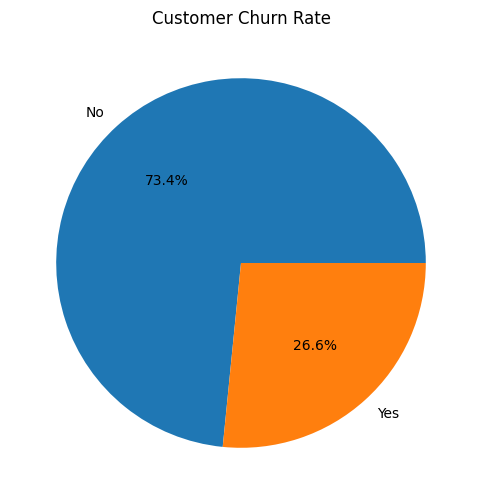

In [38]:
# Pie plot for viewing distribution of Customer Churn
customer_churn_rate = customer_churn_df_encoded['Churn'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
plt.pie(customer_churn_rate, labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Customer Churn Rate')
plt.show()

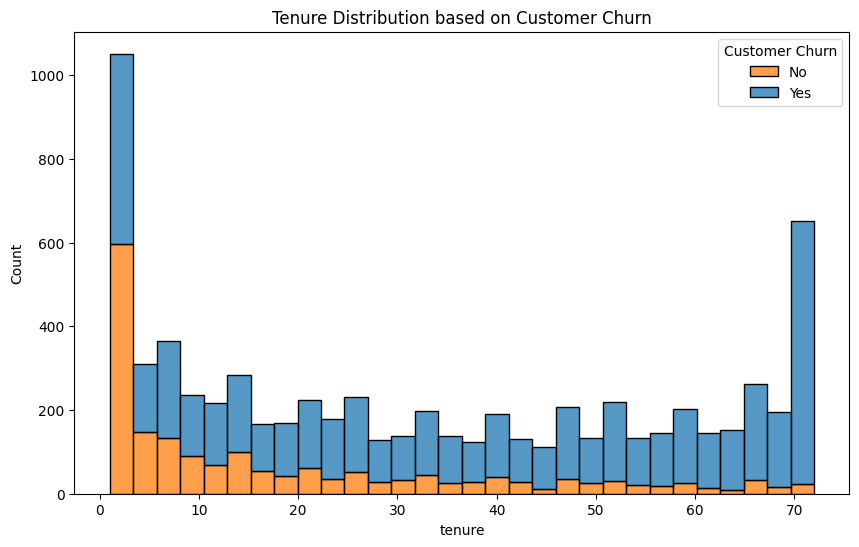

In [39]:
# Histogram for viewing Tenure distribution based on Customer Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_churn_df_encoded, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.legend(labels = ['No', 'Yes'], title='Customer Churn')
plt.title('Tenure Distribution based on Customer Churn')
plt.show()

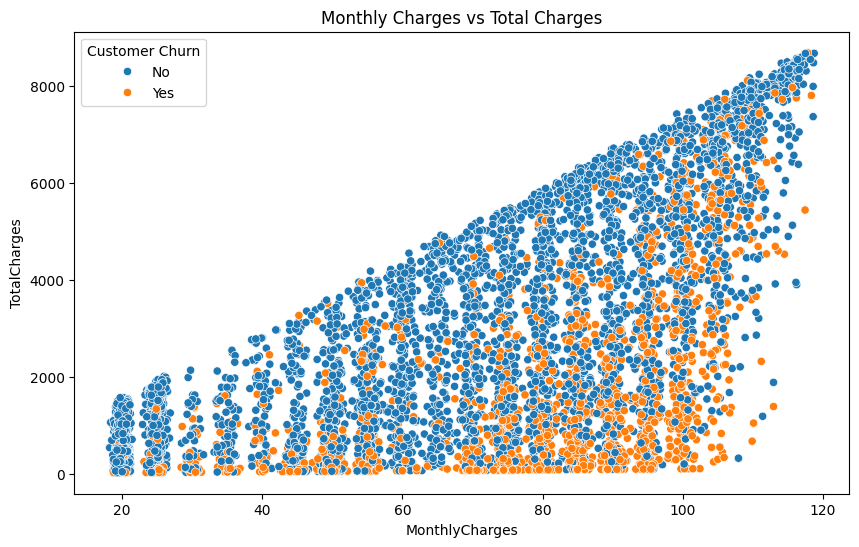

In [40]:
# Scatter plot to view Monthly charges vs Total charges based on Customer Churn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=customer_churn_df_encoded, x='MonthlyCharges', y='TotalCharges', hue='Churn')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels = ['No', 'Yes'], title='Customer Churn')
plt.title('Monthly Charges vs Total Charges')
plt.show()

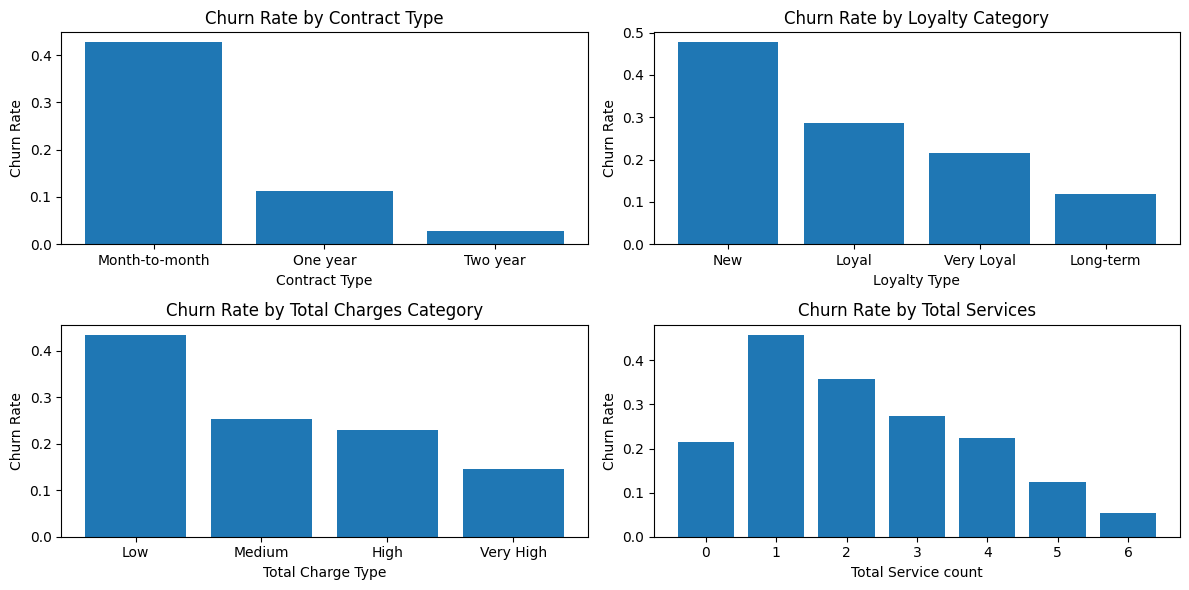

In [41]:
# Calculate Churn Rate base on different columns
contract_churn = customer_churn_df_encoded.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
loyalty_churn = customer_churn_df_encoded.groupby('LoyaltyCategory', observed=False)['Churn'].mean().sort_values(ascending=False)
total_charges_churn = customer_churn_df_encoded.groupby('TotalChargesCategory', observed=False)['Churn'].mean().sort_values(ascending=False)
total_services_churn = customer_churn_df_encoded.groupby('TotalServices', observed=False)['Churn'].mean().sort_values(ascending=False)

# Bar plots for Churn Rate based on different factors
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(contract_churn.index, contract_churn.values)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')

plt.subplot(2, 2, 2)
plt.bar(loyalty_churn.index, loyalty_churn.values)
plt.title('Churn Rate by Loyalty Category')
plt.xlabel('Loyalty Type')
plt.ylabel('Churn Rate')

plt.subplot(2, 2, 3)
plt.bar(total_charges_churn.index, total_charges_churn.values)
plt.title('Churn Rate by Total Charges Category')
plt.xlabel('Total Charge Type')
plt.ylabel('Churn Rate')

plt.subplot(2, 2, 4)
plt.bar(total_services_churn.index, total_services_churn.values)
plt.title('Churn Rate by Total Services')
plt.xlabel('Total Service count')
plt.ylabel('Churn Rate')


plt.tight_layout()
plt.show()

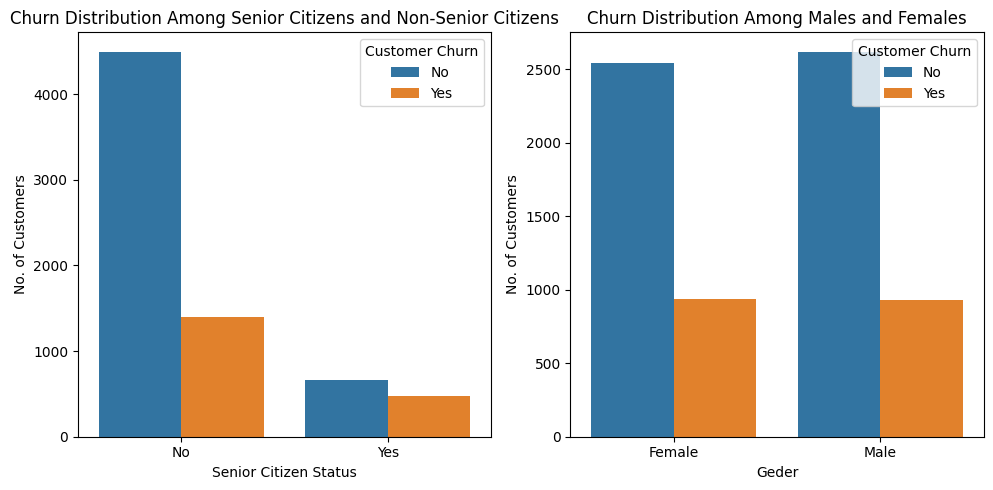

In [42]:
# Countplot to view distribution of Customer Churn among Senior Citizens and Non Senior Citizens and Males and Females
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=customer_churn_df_encoded, x='SeniorCitizen', hue='Churn')
plt.title('Churn Distribution Among Senior Citizens and Non-Senior Citizens')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Senior Citizen Status')
plt.ylabel('No. of Customers')
plt.legend(labels = ['No', 'Yes'], title='Customer Churn')

plt.subplot(1, 2, 2)
sns.countplot(data=customer_churn_df_encoded, x='gender', hue='Churn')
plt.title('Churn Distribution Among Males and Females')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Geder')
plt.ylabel('No. of Customers')
plt.legend(labels = ['No', 'Yes'], title='Customer Churn')

plt.tight_layout()
plt.show()

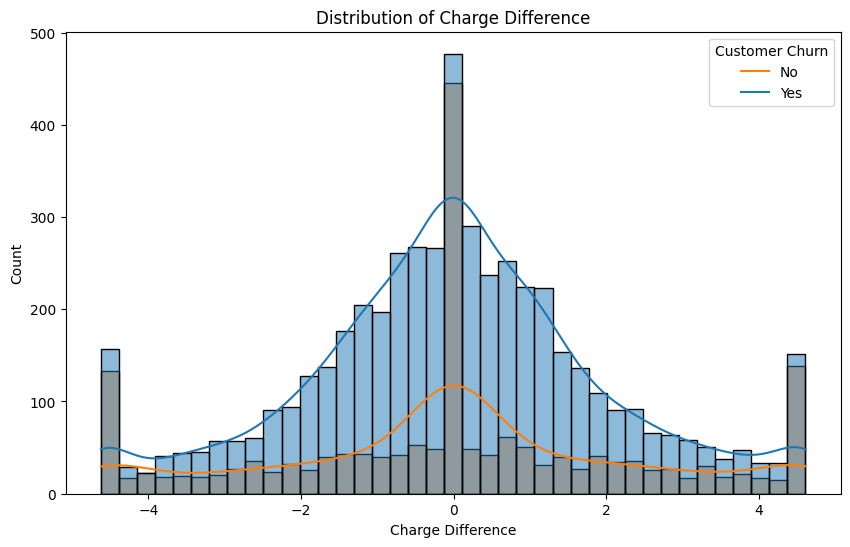

In [43]:
# Histogram to view distribution of charge difference between monthly charge and average charge
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_churn_df_encoded, x='ChargeDifference', hue='Churn', kde=True)
plt.title('Distribution of Charge Difference')
plt.xlabel('Charge Difference')
plt.legend(labels = ['No', 'Yes'], title='Customer Churn')
plt.show()

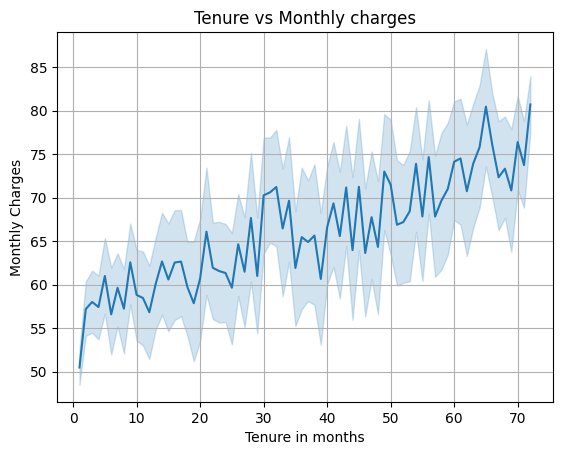

In [44]:
# Line plot to view Tenure vs Monthly Charges
plt.figure()
sns.lineplot(data=customer_churn_df_encoded, x='tenure', y='MonthlyCharges', estimator='mean')
plt.xlabel('Tenure in months')
plt.ylabel('Monthly Charges')
plt.title('Tenure vs Monthly charges')
plt.grid()
plt.show()

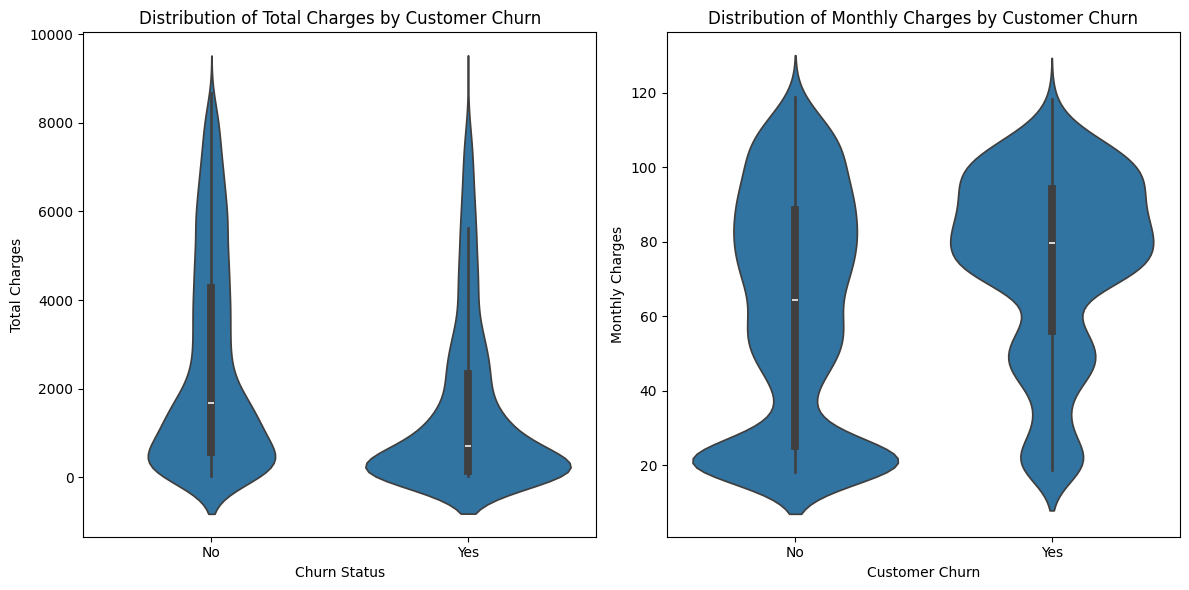

In [45]:
# Voilin plot to view ditribution of Total Charges and Monthly Charges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=customer_churn_df_encoded, x='Churn', y='TotalCharges')
plt.title('Distribution of Total Charges by Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Total Charges')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.violinplot(data=customer_churn_df_encoded, x='Churn', y='MonthlyCharges')
plt.title('Distribution of Monthly Charges by Customer Churn')
plt.xlabel('Customer Churn')
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

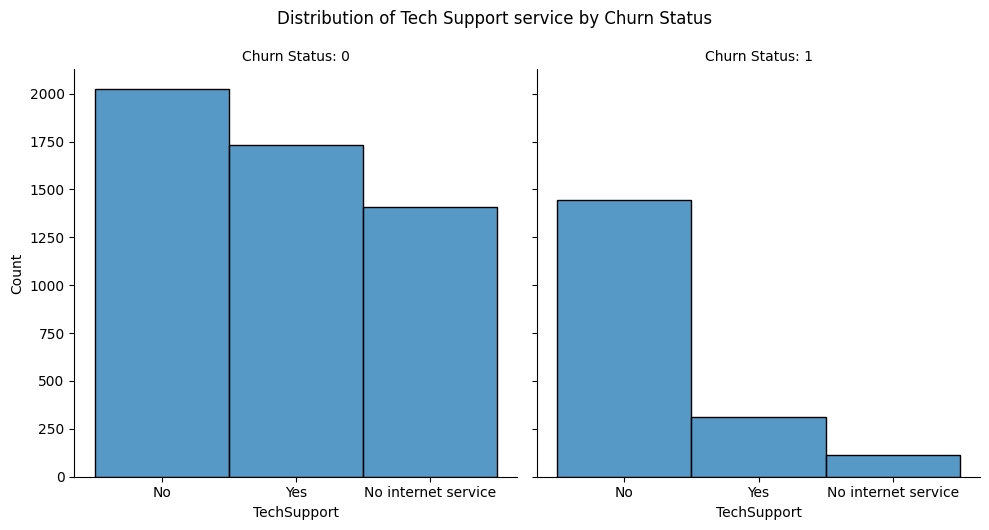

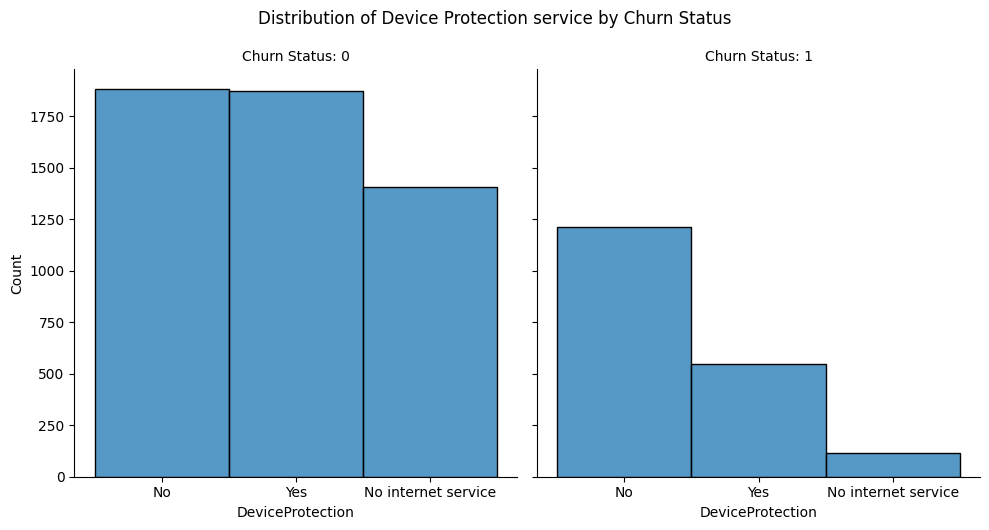

In [46]:
# FaceGrid plot to view distribution of Tech Support and Device Protection service and Customer Churn
g = sns.FacetGrid(customer_churn_df_encoded, col='Churn', height=5)
g.map(sns.histplot, 'TechSupport', bins=30)
g.set_titles('Churn Status: {col_name}')
plt.suptitle('Distribution of Tech Support service by Churn Status', y=1.05)

g = sns.FacetGrid(customer_churn_df_encoded, col='Churn', height=5)
g.map(sns.histplot, 'DeviceProtection', bins=30)
g.set_titles('Churn Status: {col_name}')
plt.suptitle('Distribution of Device Protection service by Churn Status', y=1.05)
plt.show()


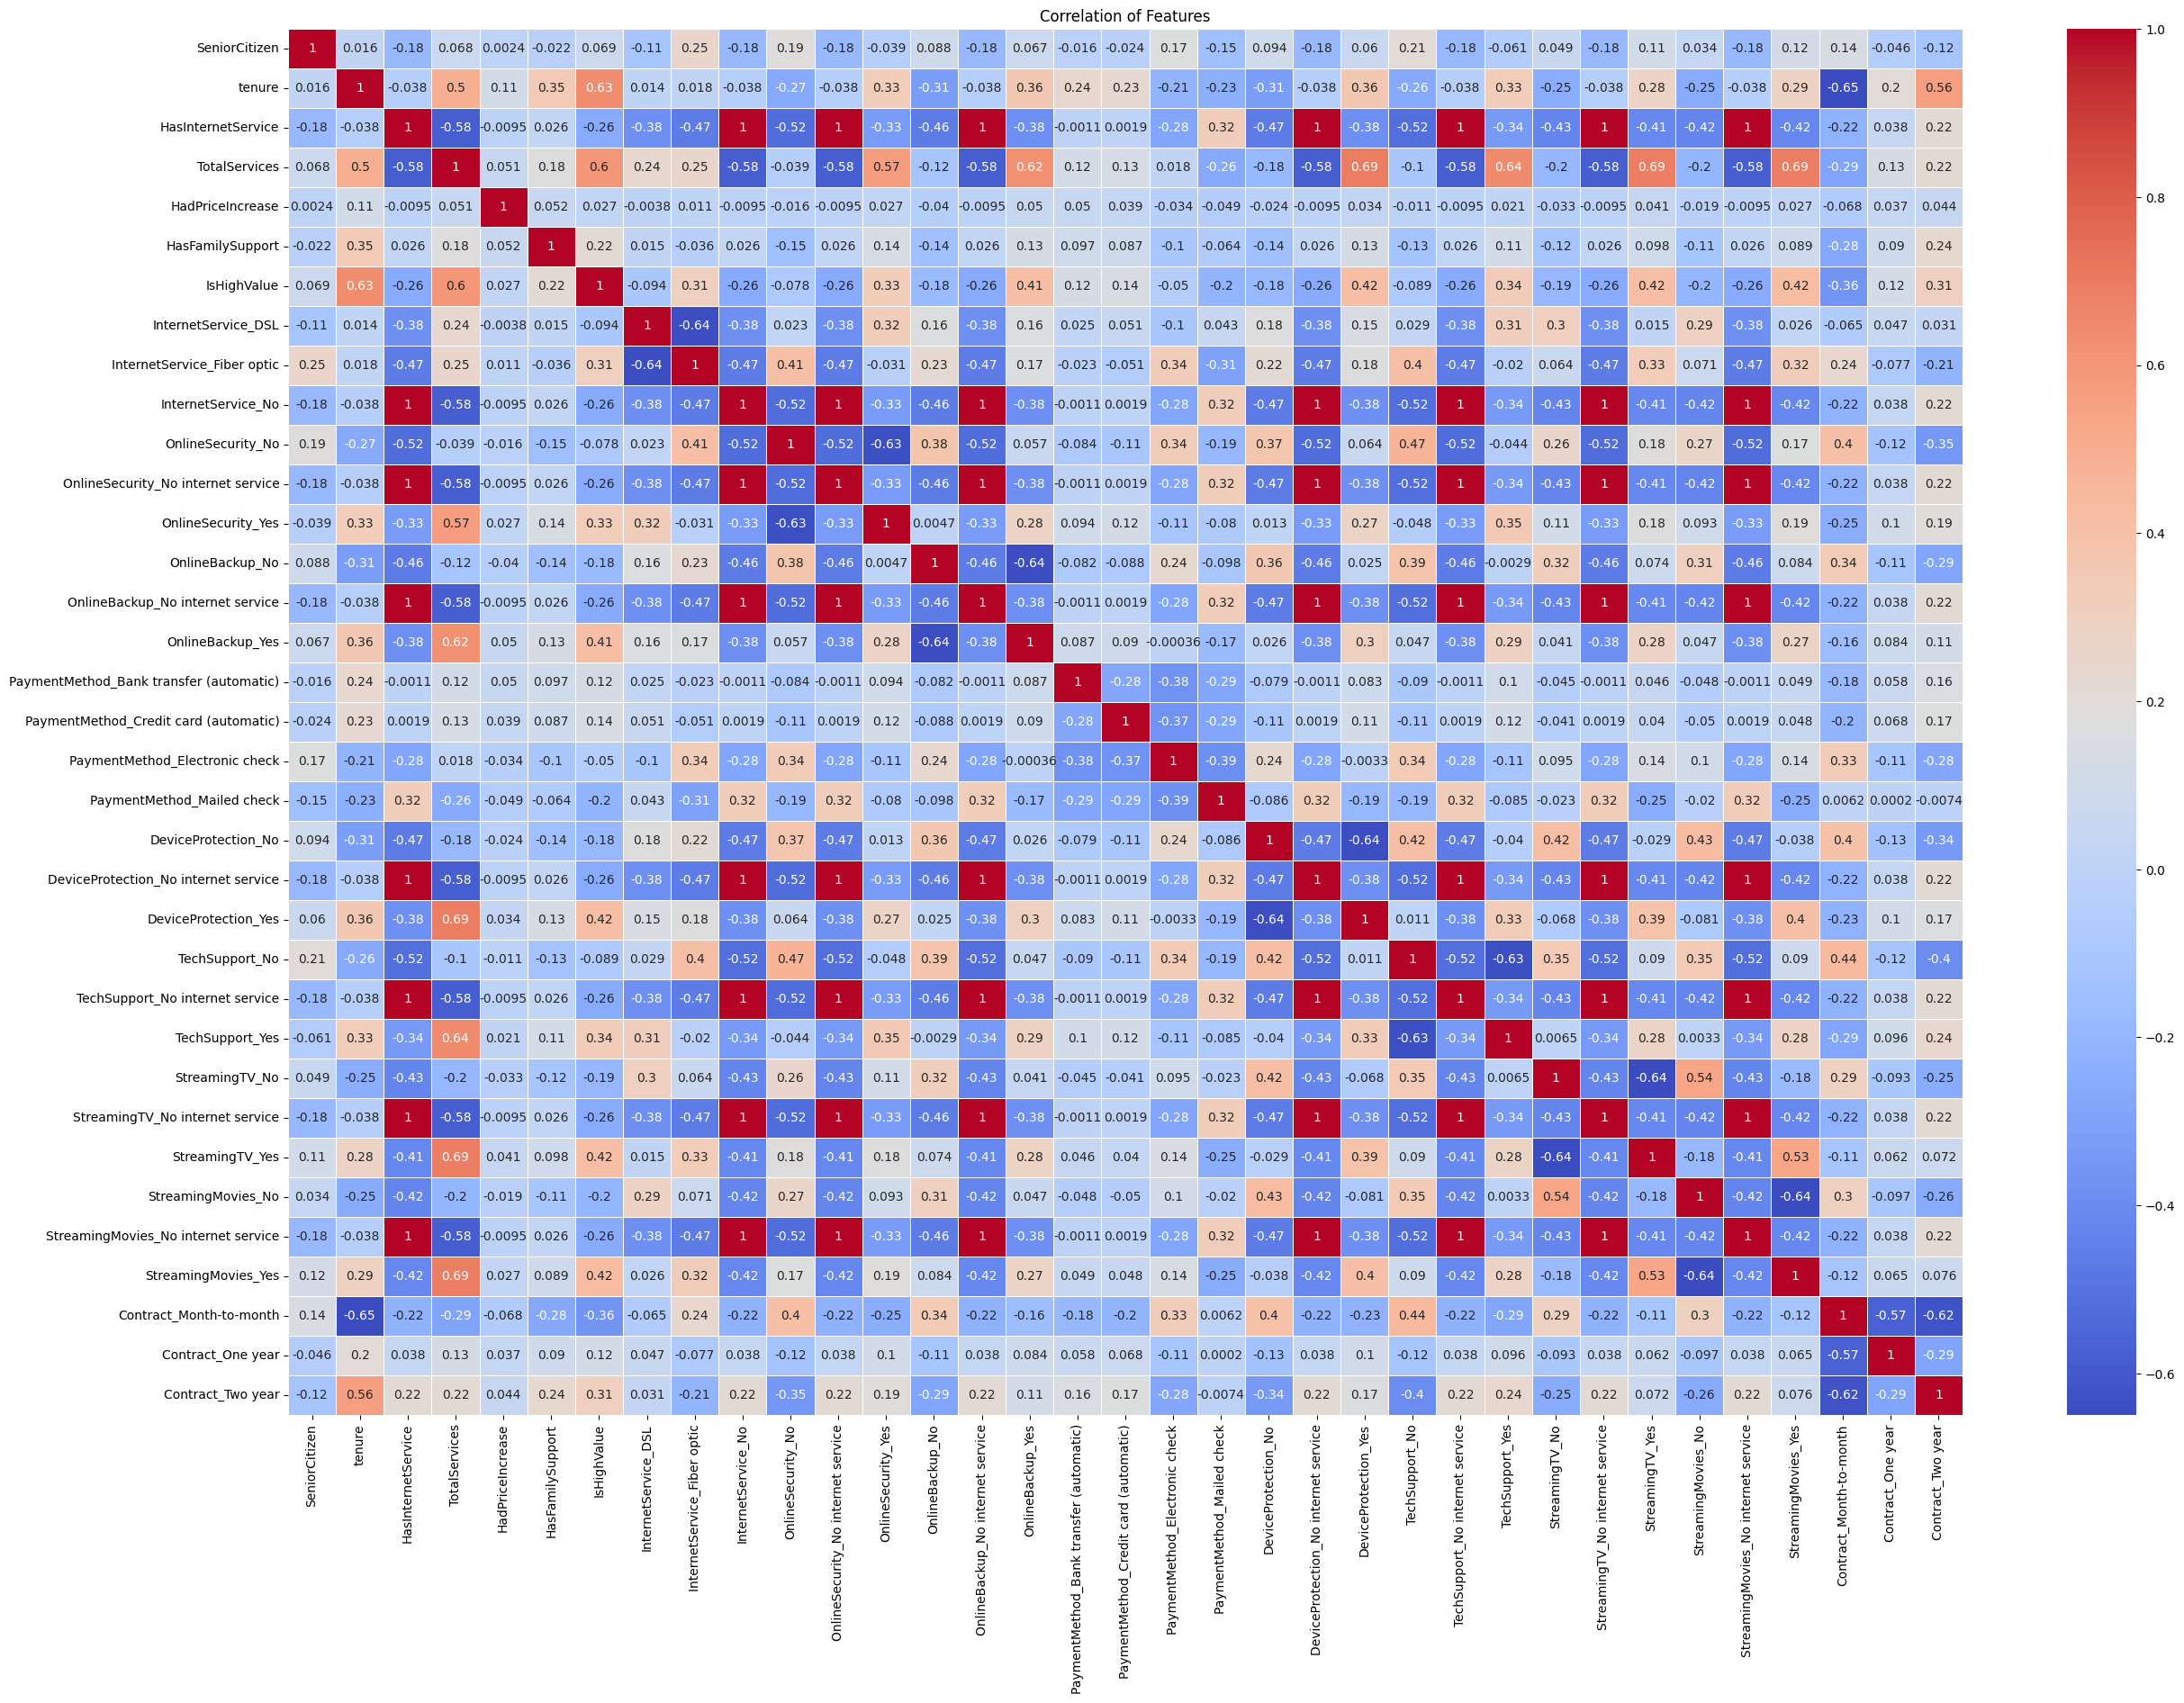

In [47]:
# Heatmap to view correlation among all the features
plt.figure(figsize=(30, 20))
churn_corr = customer_churn_df_encoded.select_dtypes(include=['int']).corr()
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features')
plt.show()


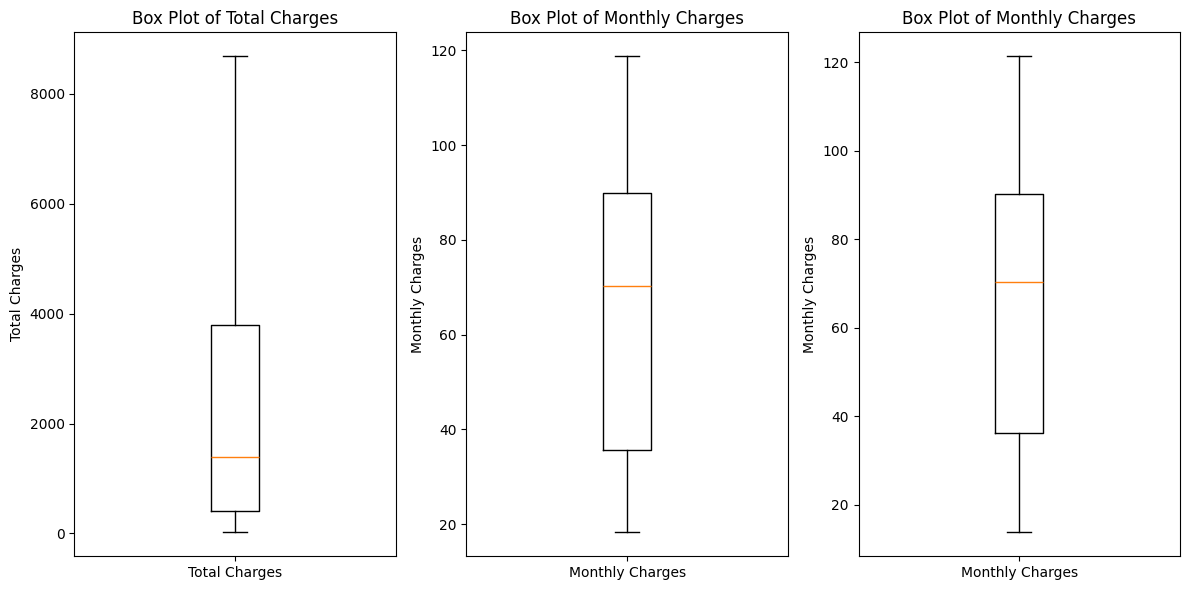

In [48]:
# Box plot to view distribution of Total charges, monthly charges and average monthly charges
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(customer_churn_df_encoded['TotalCharges'])
plt.ylabel('Total Charges')
plt.xticks([1], ['Total Charges'])
plt.title('Box Plot of Total Charges')

plt.subplot(1, 3, 2)
plt.boxplot(customer_churn_df_encoded['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.xticks([1], ['Monthly Charges'])
plt.title('Box Plot of Monthly Charges')

plt.subplot(1, 3, 3)
plt.boxplot(customer_churn_df_encoded['AvgMonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.xticks([1], ['Monthly Charges'])
plt.title('Box Plot of Monthly Charges')

plt.tight_layout()
plt.show()

### References



*   https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
*   https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html
*   https://seaborn.pydata.org/generated/seaborn.violinplot.html
*   https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
*   https://seaborn.pydata.org/generated/seaborn.histplot.html
*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html



## Project Phase 2:

In [49]:
#Loading preprocessed and encoded customer churn data
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

preprocessed_df = pd.read_csv('preprocessed_customer_churn_.csv')
encoded_df = pd.read_csv('encoded_customer_churn_.csv') #for ML models

In [50]:
X = encoded_df.drop('Churn', axis=1)  # Churn is our target variable
y = encoded_df['Churn']

# Splitting the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### KNN

In [51]:
#Checking for non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod', 'LoyaltyCategory', 'TotalChargesCategory'],
      dtype='object')


In [52]:
#Using one-hot encoding on categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#To ensure that same columns exist in both X_train and X_test
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

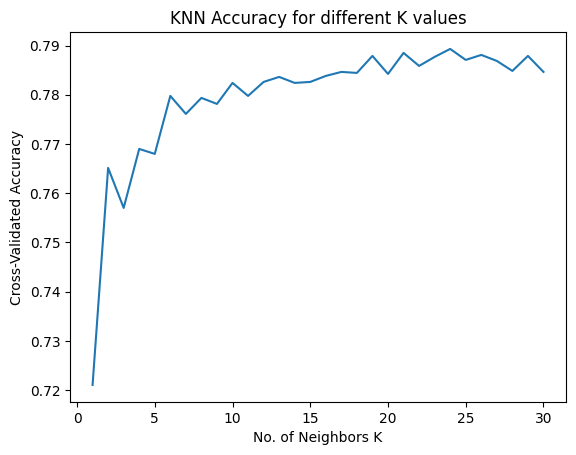

The optimal number of neighbors is 24


In [53]:
from sklearn.neighbors import KNeighborsClassifier

#Defining a range of values for n_neighbors
neighbor_values = range(1, 31)
cv_scores = []

#Performing cross-validation for each value of n_neighbors
for k in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

#Plotting the results to find the optimum number of neighbors
plt.plot(neighbor_values, cv_scores)
plt.xlabel('No. of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

#Finding the value of k with the highest accuracy
optimal_k = neighbor_values[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

In [54]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.7791469194312797


In [55]:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6537216828478964
Recall: 0.3600713012477718
F1 Score: 0.46436781609195404


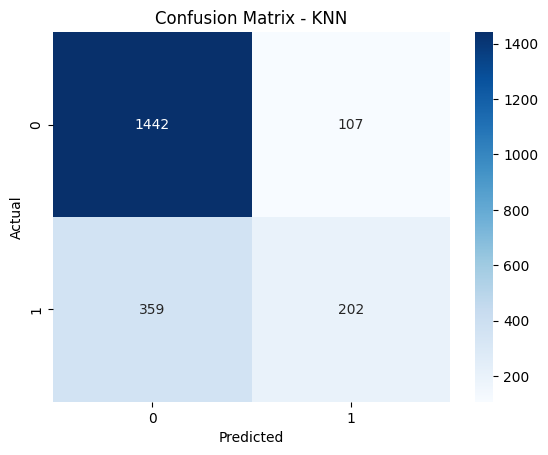

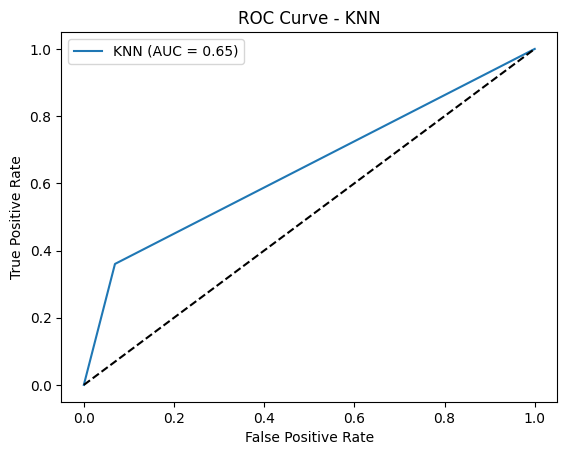

In [56]:
#Creating confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Plotting ROC Curve Graph for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='best')
plt.show()

### Logistic Regression

In [57]:
from sklearn.preprocessing import StandardScaler

# Initializing the scaler - StandardScaler function
scaler = StandardScaler()

# Fitting and transforming the training data, and then transforming the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [59]:
param_grid = [
    {
        'penalty': ['l2', None],
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'max_iter': [100, 1000, 2500, 5000]
    },
    {
        'penalty': ['l1'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear'],
        'max_iter': [100, 1000, 2500, 5000]
    },
    {
        'penalty': ['elasticnet'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['saga'],
        'max_iter': [100, 1000, 2500, 5000],
        'l1_ratio': [0.1, 0.5, 0.9]
    }
]

In [60]:
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


In [61]:
print(f"Best Estimator: {best_clf.best_estimator_}")

Best Estimator: LogisticRegression(C=0.08858667904100823, l1_ratio=0.9, penalty='elasticnet',
                   solver='saga')


In [62]:
y_pred_best = best_clf.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [63]:
print(f"Best Logistic Regression Accuracy: {accuracy_best}")

Best Logistic Regression Accuracy: 0.7976303317535545


In [64]:
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6475770925110133
Recall: 0.5240641711229946
F1 Score: 0.5793103448275863


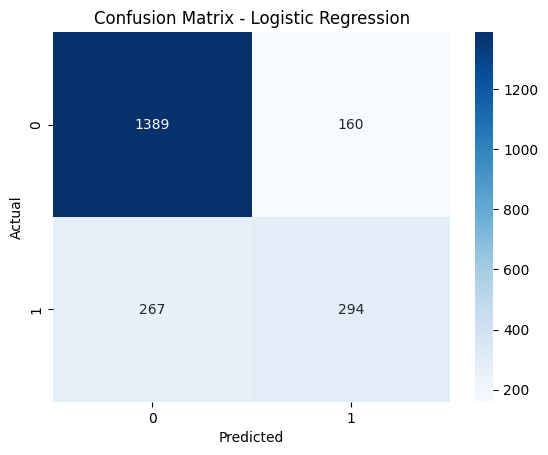

C:\Users\SWETA\AppData\Local\Temp\ipykernel_23540\2564022296.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


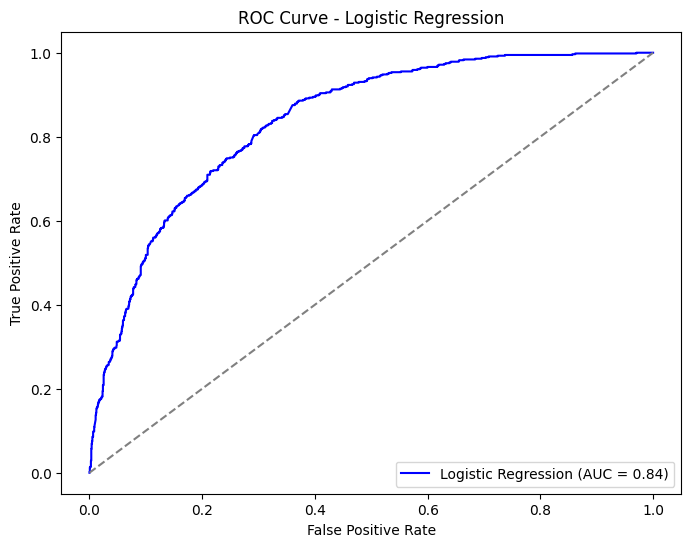

In [65]:
#Creating Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Plotting ROC Curve for Logistic Regression
y_prob_best = best_clf.predict_proba(X_test_scaled)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_best)
roc_auc_logreg = roc_auc_score(y_test, y_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB


# Defining the hyperparameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

# Creating the GaussianNB model
nb = GaussianNB()

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best model with optimal hyperparameters
best_nb = grid_search.best_estimator_

# Printing the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Predicting using the optimized model
y_pred_nb = best_nb.predict(X_test)

# Calculating metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Optimized Naive Bayes Accuracy: {accuracy_nb}")

# Calculating and printing precision, recall, and F1 score
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Best hyperparameters found by GridSearchCV:
{'var_smoothing': 0.0001}
Optimized Naive Bayes Accuracy: 0.7720379146919432
Precision: 0.5947867298578199
Recall: 0.4474153297682709
F1 Score: 0.5106815869786369


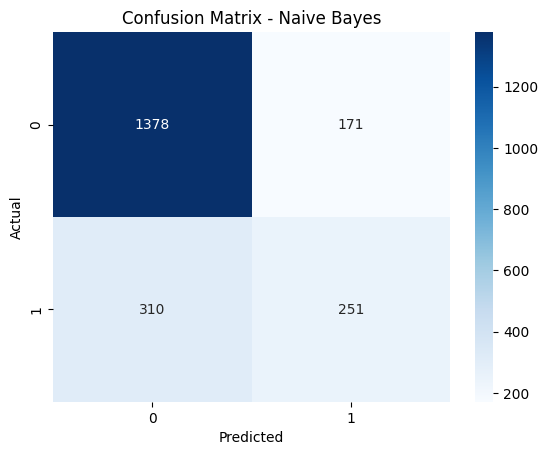

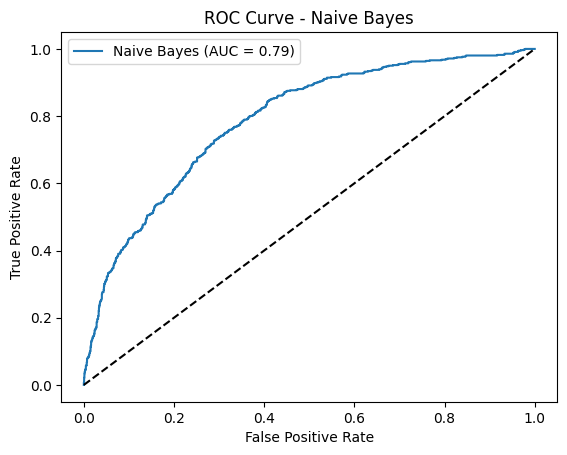

In [67]:
#Creating Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Plotting ROC Curve for Naive Bayes using probabilities
y_prob_nb = best_nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='best')
plt.show()

### Decision tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required in each leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initializing the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fitting the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Printing the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}


In [69]:
# Getting the best estimator
best_dt = grid_search.best_estimator_
print(best_dt)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=10,
                       random_state=42)


In [70]:
# Predicting on the test set
y_pred_dt = best_dt.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.7691943127962085


In [71]:
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.5825892857142857
Recall: 0.46524064171123
F1 Score: 0.5173439048562933


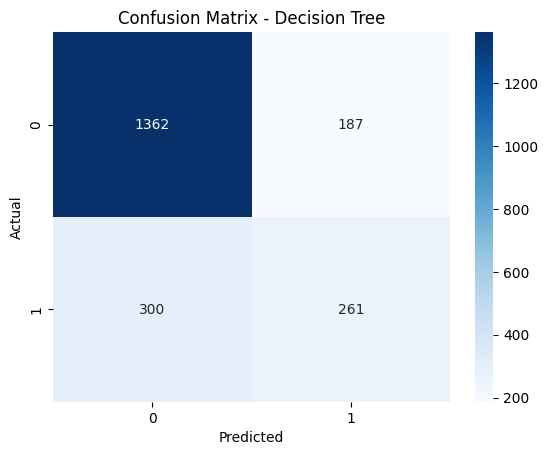

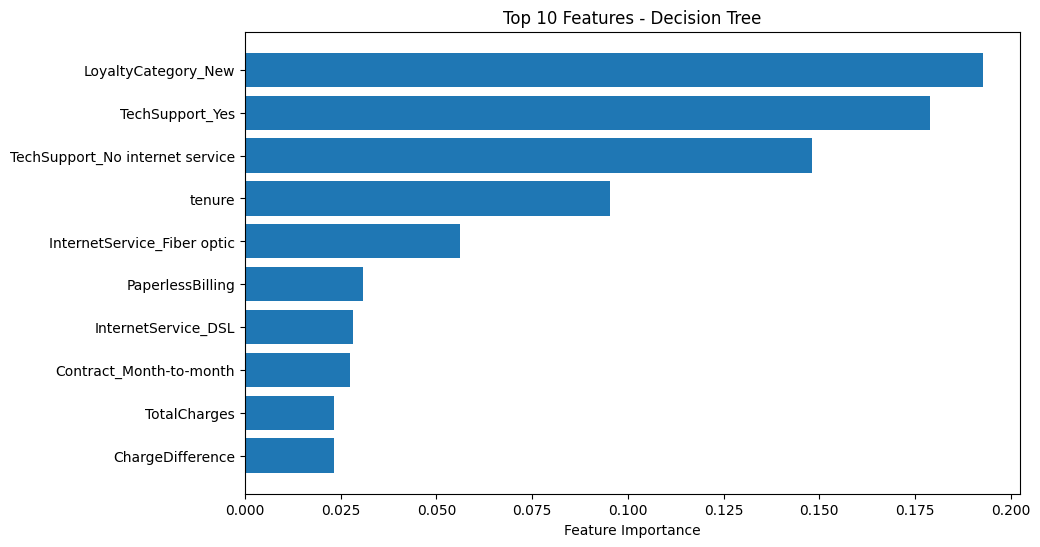

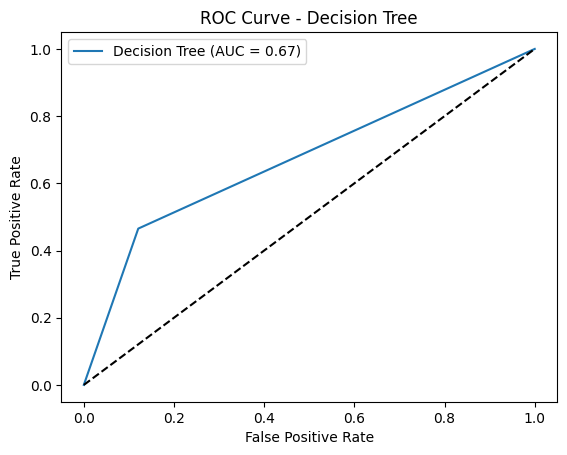

In [72]:
#Creating Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances_dt = best_dt.feature_importances_
indices_dt = np.argsort(importances_dt)[-10:]  # Top 10 important features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices_dt)), importances_dt[indices_dt], align='center')
plt.yticks(range(len(indices_dt)), [X_train.columns[i] for i in indices_dt])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features - Decision Tree')
plt.show()

#Plotting ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='best')
plt.show()

### Random Forest:

In [73]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Defining the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Setting up the Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fitting the Grid Search
grid_search.fit(X_train, y_train)

# For getting the best parameters and estimator from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
print(best_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=4,
                       n_estimators=200, random_state=42)


In [75]:
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf}")

Optimized Random Forest Accuracy: 0.790521327014218


In [76]:
# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6413301662707839
Recall: 0.48128342245989303
F1 Score: 0.5498981670061099


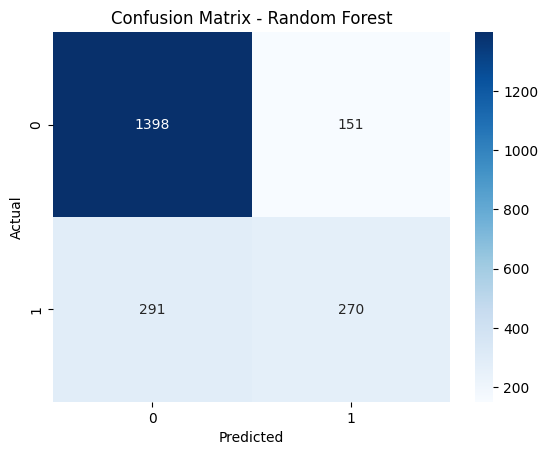

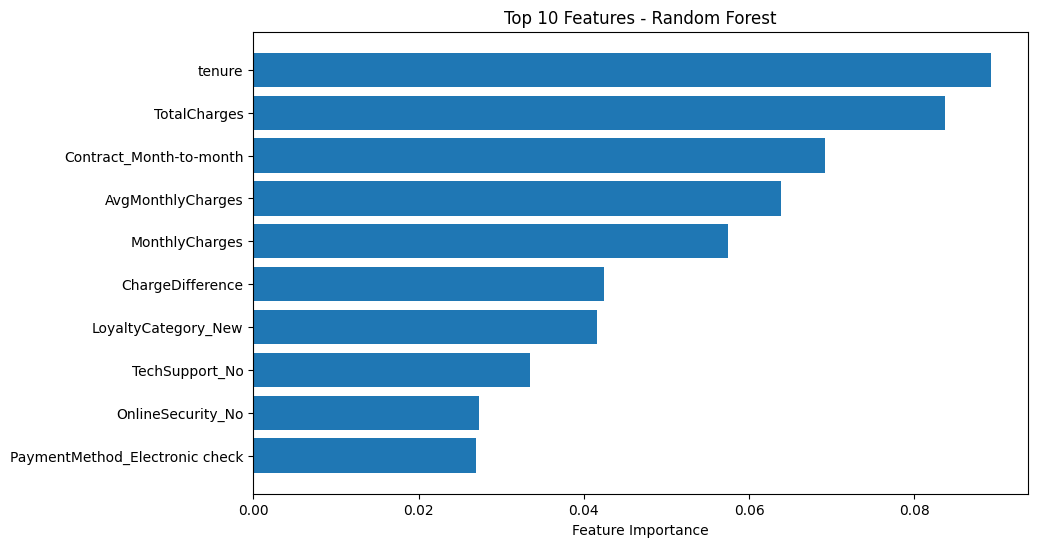

C:\Users\SWETA\AppData\Local\Temp\ipykernel_23540\1142375225.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


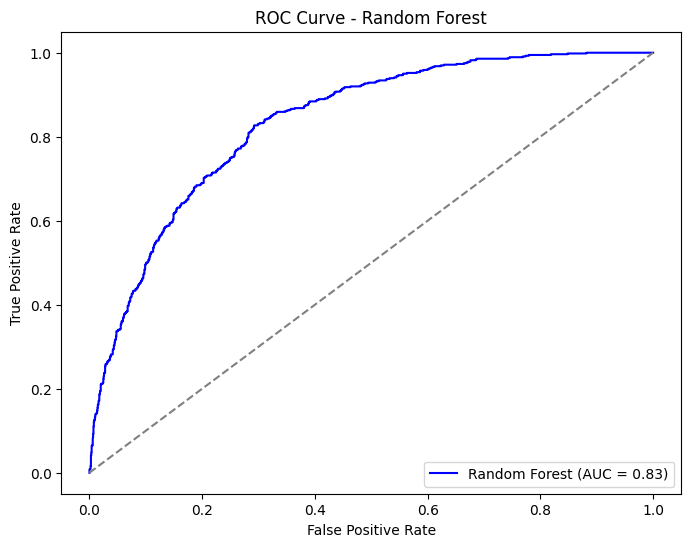

In [77]:
# Creating Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance for Random Forest
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[-10:]  # Finding the top 10 important features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [X_train.columns[i] for i in indices_rf])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features - Random Forest')
plt.show()

# Plotting ROC Curve and AUC for Random Forest
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

### SVM

In [90]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
# Fitting the model
svm.fit(X_train, y_train)
# Predicting on the test set
y_pred_svm = svm.predict(X_test)

# Calculating the accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.7872037914691943


In [91]:
# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.661849710982659
Recall: 0.40819964349376114
F1 Score: 0.5049614112458655


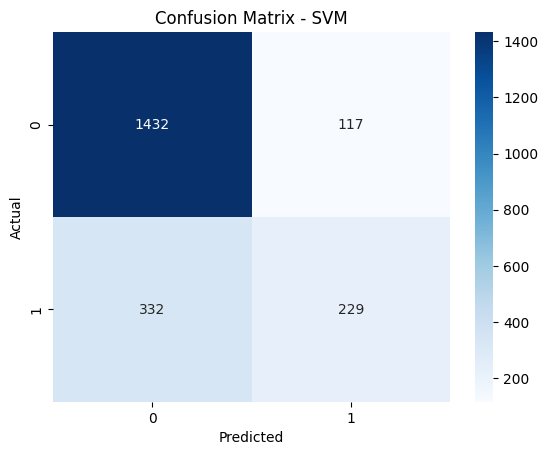

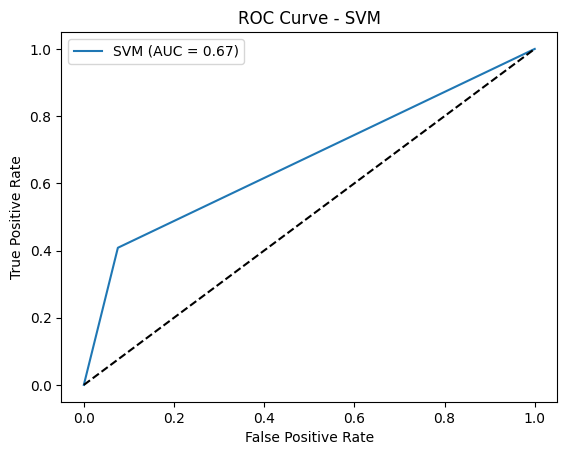

In [93]:
# Creating Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting ROC Curve for SVM (with predicted probabilities)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='best')
plt.show()

### Gradient Boosting

Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}
Optimized Gradient Boosting Accuracy: 0.79478672985782
Precision: 0.65311004784689
Recall: 0.48663101604278075
F1 Score: 0.557711950970378


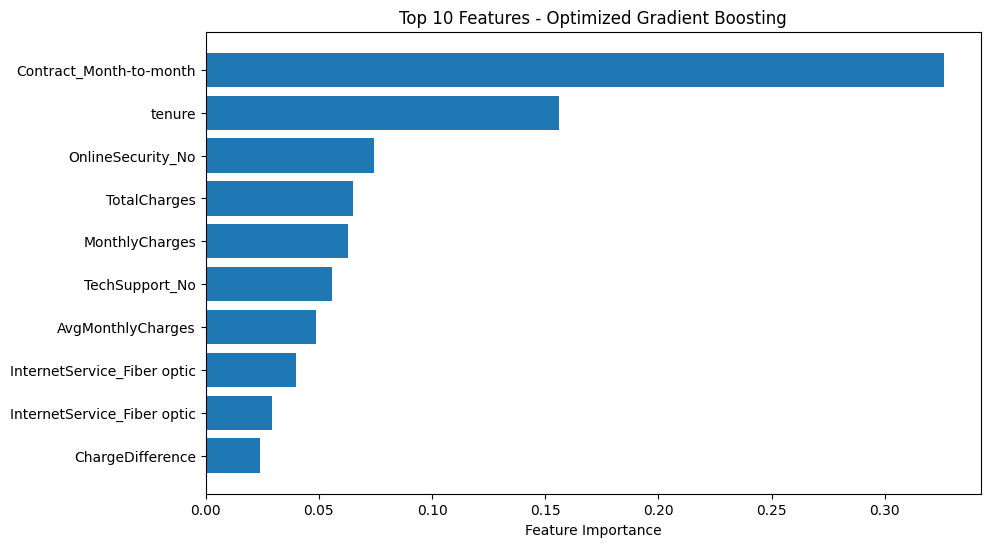

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


# Defining the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb = GradientBoostingClassifier(random_state=42)

# Using the RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    gb, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fitting RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# For finding the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Training the model using the best hyperparameters
gb_optimized = random_search.best_estimator_
# Predicting on the test data using the optimized model
y_pred_gb = gb_optimized.predict(X_test)


# Calculating Accuracy, Precision, Recall and F1-score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Optimized Gradient Boosting Accuracy: {accuracy_gb}")
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Feature Importance for Optimized Gradient Boosting
importances_gb = gb_optimized.feature_importances_
indices_gb = np.argsort(importances_gb)[-10:]  # Finding the top 10 important features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], align='center')
plt.yticks(range(len(indices_gb)), [X_train.columns[i] for i in indices_gb])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features - Optimized Gradient Boosting')
plt.show()


C:\Users\SWETA\AppData\Local\Temp\ipykernel_23540\50034007.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


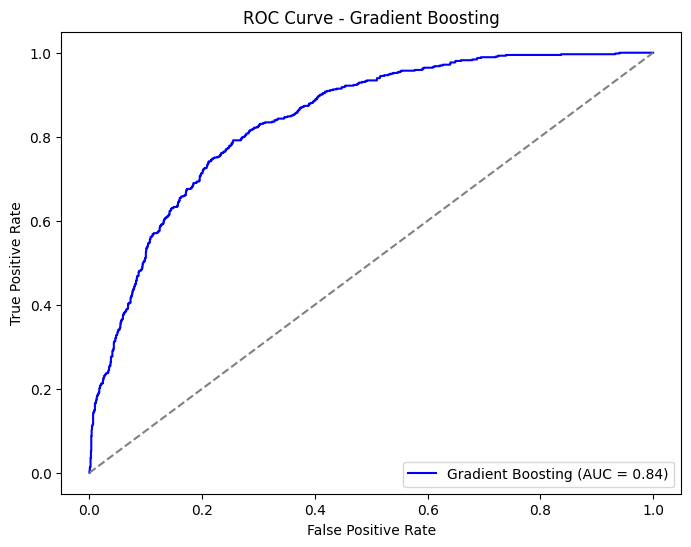

In [82]:
# Plotting the ROC Curve for Gradient Boosting
y_prob_gb = gb_optimized.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

### Adaboost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
adaboost = AdaBoostClassifier(random_state=42)

In [85]:
param_grid = {
    'n_estimators': [50, 100, 200],          # Defining the number of weak learners
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

In [86]:
# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=adaboost,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,         # Defining the number of cross-validation folds
                           n_jobs=-1)

# Fitting the model using grid search
grid_search.fit(X_train, y_train)

c:\Users\SWETA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [87]:
print("Best Hyperparameters:", grid_search.best_params_)
best_adaboost = grid_search.best_estimator_

# Predicting on the test set using the best estimator
y_pred_adaboost = best_adaboost.predict(X_test)

# Calculating and printing the accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
AdaBoost Accuracy: 0.7981042654028436


In [88]:
# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred_adaboost)
recall = recall_score(y_test, y_pred_adaboost)
f1 = f1_score(y_test, y_pred_adaboost)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.6573426573426573
Recall: 0.5026737967914439
F1 Score: 0.5696969696969697


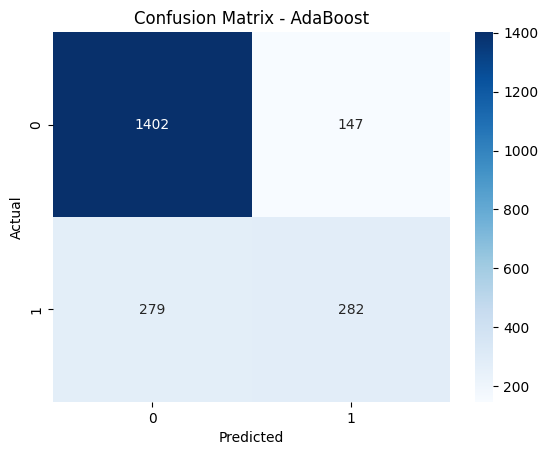

C:\Users\SWETA\AppData\Local\Temp\ipykernel_23540\1454571005.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


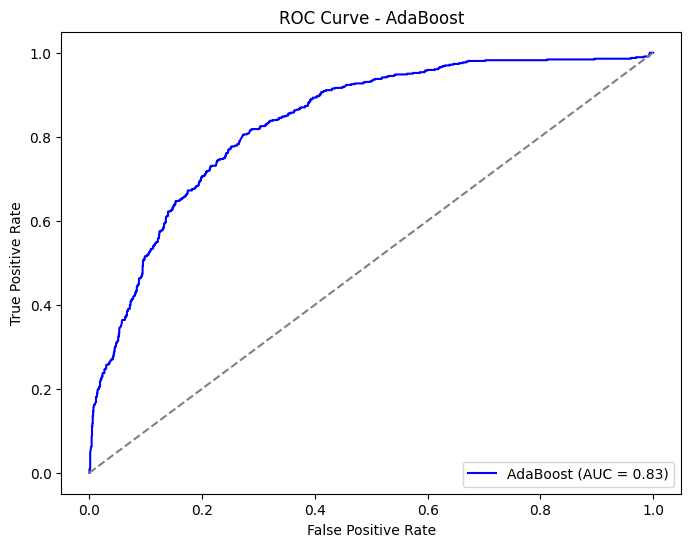

In [89]:
# Creating Confusion Matrix for AdaBoost
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting ROC Curve and AUC for AdaBoost (using probabilities)
y_prob_adaboost = best_adaboost.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc='lower right')
plt.show()

### References
1. Random Forest Classifier: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
2. Gradient Boosting Classifier:https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
3. Decision Tree Classifier: https://scikit-learn.org/1.5/modules/tree.html 
4. AdaBoost Classifier: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html